In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
raw_csv_data = pd.read_csv('kobe-shot-data.csv')
raw_csv_data

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30692,Jump Shot,Jump Shot,397,49900088,33.9963,1,48,-118.2688,6,4,...,2PT Field Goal,Center(C),In The Paint (Non-RA),Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30693
30693,Tip Shot,Tip Shot,398,49900088,34.0443,0,0,-118.2698,6,4,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30694
30694,Running Jump Shot,Jump Shot,426,49900088,33.8783,-134,166,-118.4038,3,4,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30695
30695,Jump Shot,Jump Shot,448,49900088,33.7773,31,267,-118.2388,2,4,...,3PT Field Goal,Center(C),Above the Break 3,24+ ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30696


### Removing Missing Values

In [3]:
df = raw_csv_data.copy()
df.info()
#shot_made_flag has null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   action_type         30697 non-null  object 
 1   combined_shot_type  30697 non-null  object 
 2   game_event_id       30697 non-null  int64  
 3   game_id             30697 non-null  int64  
 4   lat                 30697 non-null  float64
 5   loc_x               30697 non-null  int64  
 6   loc_y               30697 non-null  int64  
 7   lon                 30697 non-null  float64
 8   minutes_remaining   30697 non-null  int64  
 9   period              30697 non-null  int64  
 10  playoffs            30697 non-null  int64  
 11  season              30697 non-null  object 
 12  seconds_remaining   30697 non-null  int64  
 13  shot_distance       30697 non-null  int64  
 14  shot_made_flag      25697 non-null  float64
 15  shot_type           30697 non-null  object 
 16  shot

In [4]:
df = df.dropna(axis=0, subset = ['shot_made_flag'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25697 entries, 1 to 30696
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   action_type         25697 non-null  object 
 1   combined_shot_type  25697 non-null  object 
 2   game_event_id       25697 non-null  int64  
 3   game_id             25697 non-null  int64  
 4   lat                 25697 non-null  float64
 5   loc_x               25697 non-null  int64  
 6   loc_y               25697 non-null  int64  
 7   lon                 25697 non-null  float64
 8   minutes_remaining   25697 non-null  int64  
 9   period              25697 non-null  int64  
 10  playoffs            25697 non-null  int64  
 11  season              25697 non-null  object 
 12  seconds_remaining   25697 non-null  int64  
 13  shot_distance       25697 non-null  int64  
 14  shot_made_flag      25697 non-null  float64
 15  shot_type           25697 non-null  object 
 16  shot

In [5]:
df.isnull().values.any()
#No more null values

False

### Data Visualisation

##### Shot location on the court

In [6]:
colors = np.where(df['shot_made_flag']==1, "cyan", "red")
colors.shape

(25697,)

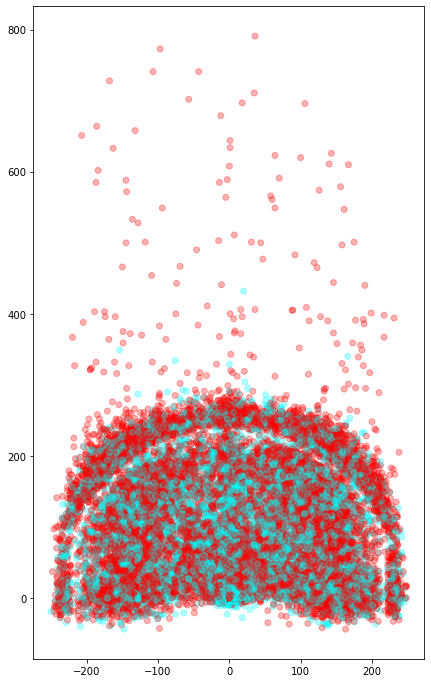

In [7]:
plt.figure(figsize=(7,12))
#plt.subplot(121) #plt.subplot(1,2,1) 1 row, 2 columns, 1=leftmost
plt.scatter(df['loc_x'], df['loc_y'], color=colors,  alpha=0.3)
plt.show()

##### Shot type percentage

In [8]:
shot_type = df['combined_shot_type'].unique()
shot_type

array(['Jump Shot', 'Dunk', 'Layup', 'Tip Shot', 'Hook Shot', 'Bank Shot'],
      dtype=object)

In [9]:
shot_perc = {}
for i in shot_type:
    perc = df.loc[df['combined_shot_type'] == i]['shot_made_flag'].mean()
    shot_perc[i] = perc
shot_perc

{'Jump Shot': 0.3910705225773719,
 'Dunk': 0.928030303030303,
 'Layup': 0.5650926743159753,
 'Tip Shot': 0.34868421052631576,
 'Hook Shot': 0.5354330708661418,
 'Bank Shot': 0.7916666666666666}

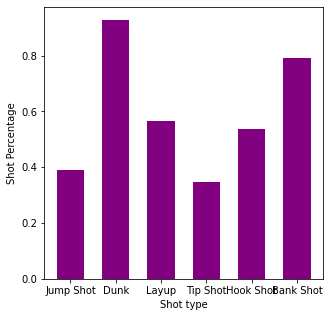

In [10]:
plt.figure(figsize=(5,5))
plt.bar(shot_perc.keys(), shot_perc.values(), color ='purple', width = 0.6)
plt.xlabel("Shot type")
plt.ylabel("Shot Percentage")
plt.show()

Dunks and Bank shots have highest percentage

##### Shot zone percentage

In [11]:
shot_zones = df['shot_zone_range'].unique()
shot_zones

array(['8-16 ft.', '16-24 ft.', 'Less Than 8 ft.', '24+ ft.',
       'Back Court Shot'], dtype=object)

In [12]:
shot_perc = {}
for i in shot_zones:
    perc = df.loc[df['shot_zone_range'] == i]['shot_made_flag'].mean()
    shot_perc[i] = perc
shot_perc

{'8-16 ft.': 0.43548387096774194,
 '16-24 ft.': 0.40176632401911105,
 'Less Than 8 ft.': 0.5731195112638412,
 '24+ ft.': 0.33251278167013826,
 'Back Court Shot': 0.013888888888888888}

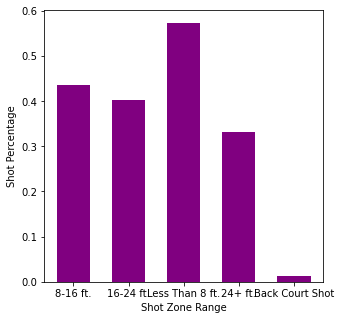

In [13]:
plt.figure(figsize=(5,5))
plt.bar(shot_perc.keys(), shot_perc.values(), color ='purple', width = 0.6)
plt.xlabel("Shot Zone Range")
plt.ylabel("Shot Percentage")
plt.show()

As the distance increases, shot percentage decreases

##### Shot distance percentage

In [14]:
shot_distances = df['shot_distance'].unique()
shot_distances.sort()
shot_distances

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68,
       69, 70, 71, 74, 77, 79], dtype=int64)

In [15]:
shot_perc = {}
for i in shot_distances:
    if i < 40:
        perc = df.loc[df['shot_distance'] == i]['shot_made_flag'].mean()
        shot_perc[i] = perc

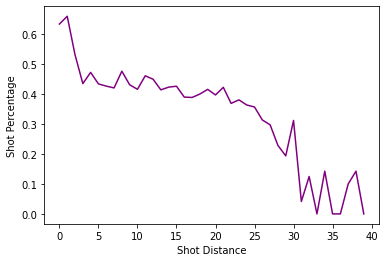

In [16]:
plt.plot(shot_perc.keys(), shot_perc.values(), c='purple')
plt.xlabel("Shot Distance")
plt.ylabel("Shot Percentage")
plt.show()

##### Shot period vs shot percentage

In [17]:
shot_periods = df['period'].unique()
shot_periods

array([1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [18]:
shot_perc = {}
for i in shot_periods:
    if i <= 4:
        perc = df.loc[df['period'] == i]['shot_made_flag'].mean()
        shot_perc[i] = perc
shot_perc

{1: 0.46567164179104475,
 2: 0.4488021295474712,
 3: 0.45344187375035705,
 4: 0.4137018037398643}

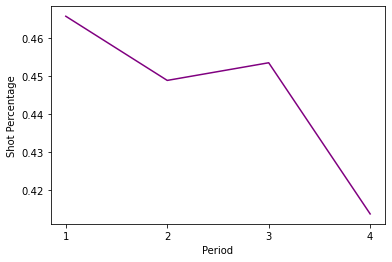

In [19]:
plt.plot(shot_perc.keys(), shot_perc.values(), c='purple')
plt.xlabel("Period")
plt.ylabel("Shot Percentage")
plt.xticks(range(1, 5))
plt.show()

shot percentage decreases as kobe gets more tired. 3rd quarter has higher percentage (Perhaps because of halftime break).

##### Regular season vs playoffs

In [20]:
shot_perc = {}
for i in range(2):
    perc = df.loc[df['playoffs'] == i]['shot_made_flag'].mean()
    if i == 0:
        shot_perc['regular season'] = perc
    else:
        shot_perc['playoffs'] = perc
shot_perc

{'regular season': 0.4464196180318155, 'playoffs': 0.4446514103246408}

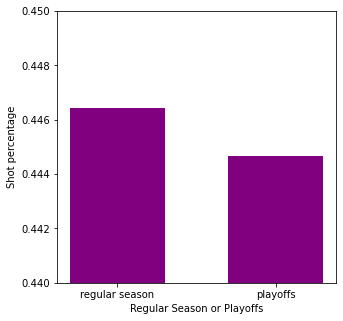

In [21]:
plt.figure(figsize=(5,5))
plt.bar(shot_perc.keys(), shot_perc.values(), color ='purple', width = 0.6)
plt.xlabel("Regular Season or Playoffs")
plt.ylabel("Shot percentage")
plt.ylim(0.44, 0.45)
plt.show()

Very similar percentages. Slightly better in regular season

##### Inserting time remaining as minutes + seconds

In [22]:
df.insert(len(df.columns), 'time_remaining', pd.Series(df.minutes_remaining*60 + df.seconds_remaining))
df = df.drop(['minutes_remaining', 'seconds_remaining'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25697 entries, 1 to 30696
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   action_type         25697 non-null  object 
 1   combined_shot_type  25697 non-null  object 
 2   game_event_id       25697 non-null  int64  
 3   game_id             25697 non-null  int64  
 4   lat                 25697 non-null  float64
 5   loc_x               25697 non-null  int64  
 6   loc_y               25697 non-null  int64  
 7   lon                 25697 non-null  float64
 8   period              25697 non-null  int64  
 9   playoffs            25697 non-null  int64  
 10  season              25697 non-null  object 
 11  shot_distance       25697 non-null  int64  
 12  shot_made_flag      25697 non-null  float64
 13  shot_type           25697 non-null  object 
 14  shot_zone_area      25697 non-null  object 
 15  shot_zone_basic     25697 non-null  object 
 16  shot

In [23]:
time_remaining = df['time_remaining'].unique()
time_remaining.sort()

In [24]:
shot_perc = {}
for i in time_remaining:
    perc = df.loc[df['time_remaining'] == i]['shot_made_flag'].mean()
    shot_perc[i] = perc

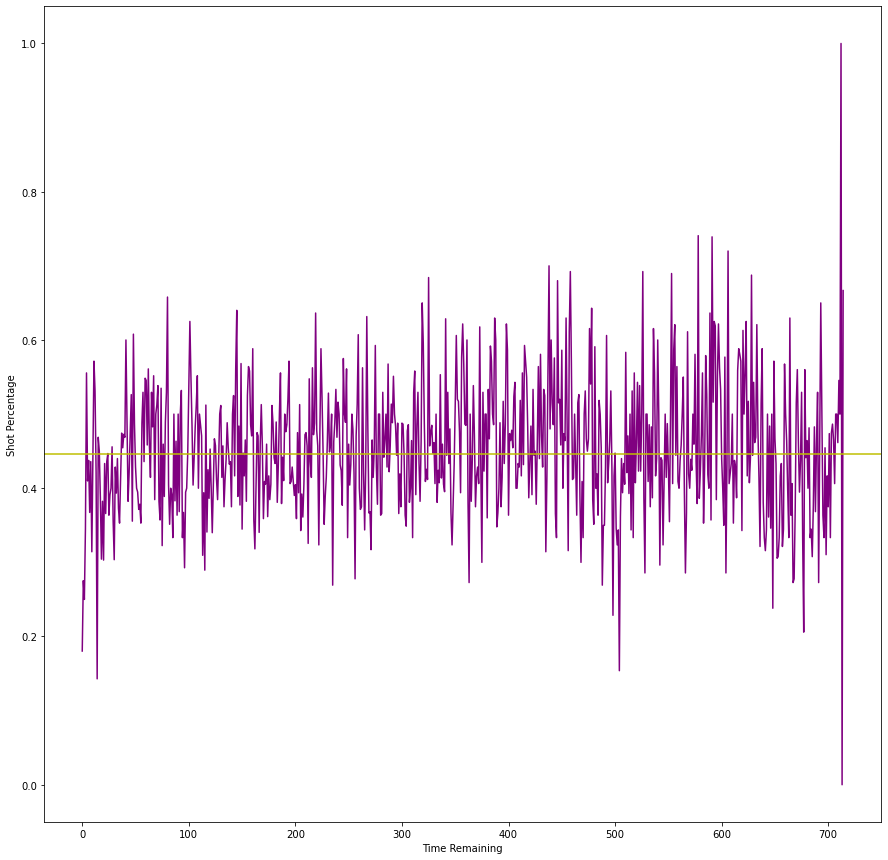

In [25]:
plt.figure(figsize=(15,15))
plt.plot(shot_perc.keys(), shot_perc.values(), c='purple')
plt.axhline(y = df['shot_made_flag'].mean(), color = 'y', linestyle = '-')
plt.xlabel("Time Remaining")
plt.ylabel("Shot Percentage")
plt.show()

No pattern seen here. Yellow line indicates his average shot percentage

### Data preprocessing

In [86]:
df_preprocessed = df.copy()
df_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25697 entries, 1 to 30696
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   action_type         25697 non-null  object 
 1   combined_shot_type  25697 non-null  object 
 2   game_event_id       25697 non-null  int64  
 3   game_id             25697 non-null  int64  
 4   lat                 25697 non-null  float64
 5   loc_x               25697 non-null  int64  
 6   loc_y               25697 non-null  int64  
 7   lon                 25697 non-null  float64
 8   period              25697 non-null  int64  
 9   playoffs            25697 non-null  int64  
 10  season              25697 non-null  object 
 11  shot_distance       25697 non-null  int64  
 12  shot_made_flag      25697 non-null  float64
 13  shot_type           25697 non-null  object 
 14  shot_zone_area      25697 non-null  object 
 15  shot_zone_basic     25697 non-null  object 
 16  shot

In [87]:
df_preprocessed['month'] = df_preprocessed['game_date'].str[5:7].astype(int)
df_preprocessed['year'] = df_preprocessed['game_date'].str[0:4].astype(int)
df_preprocessed['home_game'] = pd.Series([1 if 'vs.' in x else 0 for x in df_preprocessed['matchup']])
#df_preprocessed.insert(len(df_preprocessed.columns), 'home_game', pd.Series([1 if 'vs.' in x else 0 for x in df_preprocessed['matchup']]))
#df_preprocessed['home_game'] = pd.Series([1 if 'vs.' in x else 0 for x in df['matchup']]).toframe() 
df_preprocessed = df_preprocessed.drop(['game_id', 'game_event_id', 'team_id', 'team_name', 'matchup', 'shot_id', 'game_date', 'season', 'opponent'], axis=1)

df_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25697 entries, 1 to 30696
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   action_type         25697 non-null  object 
 1   combined_shot_type  25697 non-null  object 
 2   lat                 25697 non-null  float64
 3   loc_x               25697 non-null  int64  
 4   loc_y               25697 non-null  int64  
 5   lon                 25697 non-null  float64
 6   period              25697 non-null  int64  
 7   playoffs            25697 non-null  int64  
 8   shot_distance       25697 non-null  int64  
 9   shot_made_flag      25697 non-null  float64
 10  shot_type           25697 non-null  object 
 11  shot_zone_area      25697 non-null  object 
 12  shot_zone_basic     25697 non-null  object 
 13  shot_zone_range     25697 non-null  object 
 14  time_remaining      25697 non-null  int64  
 15  month               25697 non-null  int32  
 16  year

In [88]:
#For some reason, there is some missing values in home_game. It is removing all playoff games. Therefore I will make this analysis only for regular season
df_preprocessed = df_preprocessed.dropna(axis=0, subset = ['home_game'])

In [89]:
#From locx and locy, we can get location of shot.. therefore following columns not required
df_preprocessed = df_preprocessed.drop(['action_type', 'shot_type', 'shot_zone_area', 'shot_zone_basic', 'shot_zone_range', 'playoffs'], axis=1)

<AxesSubplot:>

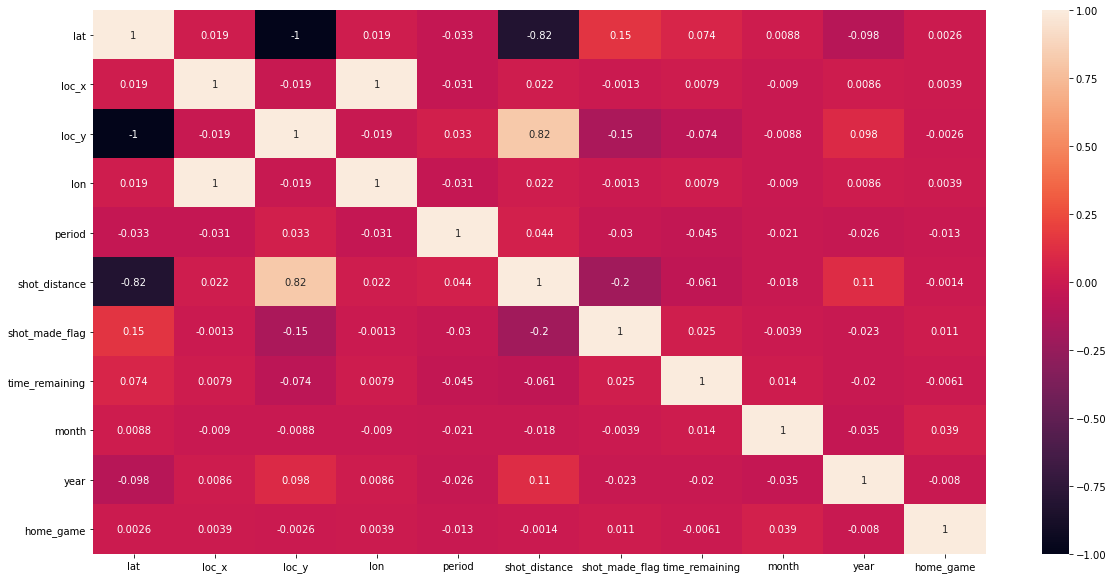

In [90]:
#Do we need lon and lat? It is the mirror of loc_x and loc_y
#This can be evidently seen in the correlation matrix
plt.figure(figsize=(20, 10))
sns.heatmap(df_preprocessed.corr(),annot = True)
#Notice the -1 and 1

In [91]:
df_preprocessed = df_preprocessed.drop(['lon', 'lat'], axis=1)

In [92]:
df_preprocessed.columns.values

array(['combined_shot_type', 'loc_x', 'loc_y', 'period', 'shot_distance',
       'shot_made_flag', 'time_remaining', 'month', 'year', 'home_game'],
      dtype=object)

In [95]:
column_names_reordered = ['loc_x', 'loc_y', 'shot_distance', 'period', 'time_remaining', 'combined_shot_type',
        'month', 'year', 'home_game', 
       'shot_made_flag']
df_preprocessed = df_preprocessed[column_names_reordered]
df_preprocessed.head()

,loc_x,loc_y,shot_distance,period,time_remaining,combined_shot_type,month,year,home_game,shot_made_flag
1,-157,0,15,1,622,Jump Shot,10,2000,0.0,0.0
2,-101,135,16,1,465,Jump Shot,10,2000,0.0,1.0
3,138,175,22,1,412,Jump Shot,10,2000,0.0,0.0
4,0,0,0,2,379,Dunk,10,2000,0.0,1.0
5,-145,-11,14,3,572,Jump Shot,10,2000,0.0,0.0


<AxesSubplot:>

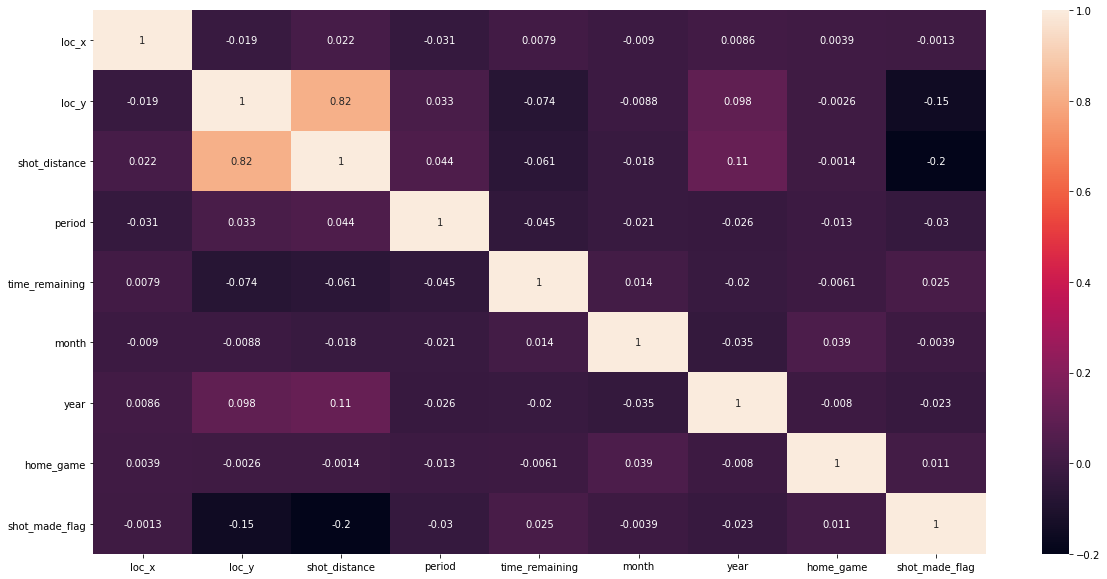

In [96]:
plt.figure(figsize=(20, 10))
sns.heatmap(df_preprocessed.corr(),annot = True)

In [106]:
#bruh... no correlation at all. Ill make basic model only with combined shot type and locx, locy
basic_columns = ['loc_x', 'loc_y', 'combined_shot_type', 'shot_made_flag']
df_preprocessed_basic = df_preprocessed[basic_columns]
df_preprocessed_basic.rename(columns = {'combined_shot_type':'shot_type'}, inplace = True)
#df_preprocessed_basic = df_preprocessed_basic[]
df_preprocessed_basic

C:\Users\D T Home\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,loc_x,loc_y,shot_type,shot_made_flag
1,-157,0,Jump Shot,0.0
2,-101,135,Jump Shot,1.0
3,138,175,Jump Shot,0.0
4,0,0,Dunk,1.0
5,-145,-11,Jump Shot,0.0
...,...,...,...,...
25692,-23,63,Jump Shot,0.0
25693,12,12,Layup,0.0
25694,-81,154,Jump Shot,1.0
25695,5,5,Dunk,1.0


In [107]:
df_preprocessed_basic.to_csv('Kobe_Shots_Preprocessed.csv', index=False)

In [108]:
df_preprocessed_basic['shot_type'].unique()

array(['Jump Shot', 'Dunk', 'Layup', 'Tip Shot', 'Hook Shot', 'Bank Shot'],
      dtype=object)